### Exploratory Data Analysis
1. Distribution of male or female
    * Bar chart
    * Pie chart
2. What Distributio of size of all images
    * Histogram
    * Box plot
    * Split by "gender"
3. Make the decision of width & height to resize using above chart.
4. Remove the few images that are having very less size

In [2]:
!pip install seaborn

You should consider upgrading via the 'H:\Programacion\UdemyCourse\computer_vision_flask_web_app\flask-firebase\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#computer vision library
import cv2

#glob
from glob import glob

In [4]:
# extract path of male and female in crop_data folder and put them in a list
fpath = glob('./2_Train_FaceRecognition_with_ML/2_Train_FaceRecognition_with_ML/crop_data/female/*.jpg')
mpath = glob('./2_Train_FaceRecognition_with_ML/2_Train_FaceRecognition_with_ML/crop_data/male/*.jpg')

In [5]:
df_female = pd.DataFrame(fpath,columns=['filepath'])
df_female['gender']='female'

df_male = pd.DataFrame(mpath,columns=['filepath'])
df_male['gender']='male'

df=pd.concat((df_female,df_male),axis=0)

df.head()

,filepath,gender
0,./2_Train_FaceRecognition_with_ML/2_Train_Face...,female
1,./2_Train_FaceRecognition_with_ML/2_Train_Face...,female
2,./2_Train_FaceRecognition_with_ML/2_Train_Face...,female
3,./2_Train_FaceRecognition_with_ML/2_Train_Face...,female
4,./2_Train_FaceRecognition_with_ML/2_Train_Face...,female


In [6]:
df.tail()

,filepath,gender
2166,./2_Train_FaceRecognition_with_ML/2_Train_Face...,male
2167,./2_Train_FaceRecognition_with_ML/2_Train_Face...,male
2168,./2_Train_FaceRecognition_with_ML/2_Train_Face...,male
2169,./2_Train_FaceRecognition_with_ML/2_Train_Face...,male
2170,./2_Train_FaceRecognition_with_ML/2_Train_Face...,male


In [7]:
df.shape

(4757, 2)

In [8]:
# it will take each image path
# the return width of the image
def get_size(path):
    img=cv2.imread(path)
    return img.shape[0]

In [9]:
df['dimension']=df['filepath'].apply(get_size) #store dimension of image in this columns

In [10]:
df.head()

,filepath,gender,dimension
0,./2_Train_FaceRecognition_with_ML/2_Train_Face...,female,273
1,./2_Train_FaceRecognition_with_ML/2_Train_Face...,female,182
2,./2_Train_FaceRecognition_with_ML/2_Train_Face...,female,122
3,./2_Train_FaceRecognition_with_ML/2_Train_Face...,female,122
4,./2_Train_FaceRecognition_with_ML/2_Train_Face...,female,182


In [11]:
dist_gender = df['gender'].value_counts()
print(dist_gender)

female    2586
male      2171
Name: gender, dtype: int64


<AxesSubplot:>

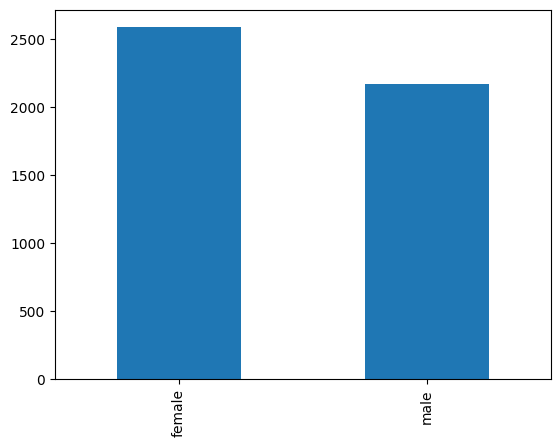

In [12]:
dist_gender.plot(kind='bar')

<AxesSubplot:ylabel='gender'>

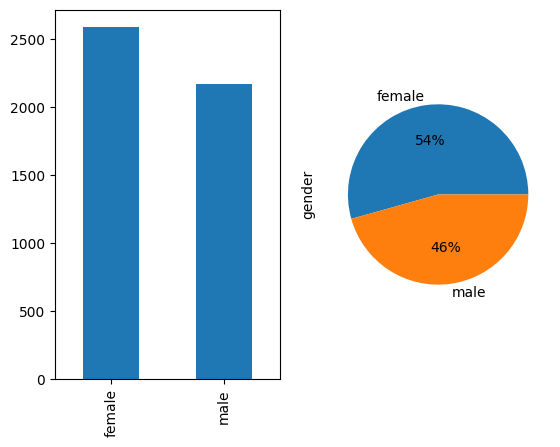

In [13]:
fig,ax = plt.subplots(nrows=1,ncols=2)
dist_gender.plot(kind='bar',ax=ax[0])
dist_gender.plot(kind='pie',ax=ax[1],autopct='%0.0f%%')

<AxesSubplot:xlabel='dimension', ylabel='Count'>

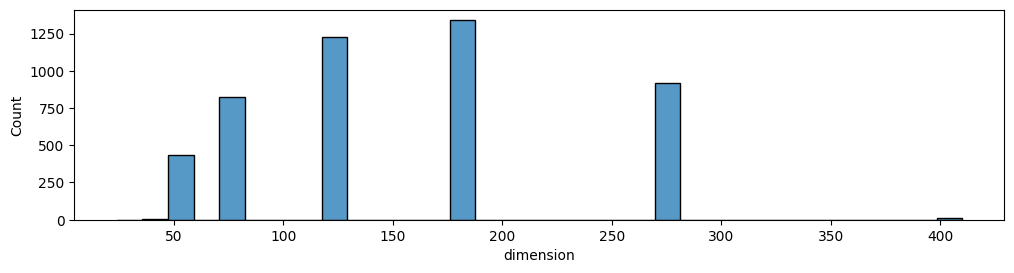

In [15]:
plt.figure(figsize=(12,6))
# histogram
plt.subplot(2,1,1)
sns.histplot(df['dimension'])

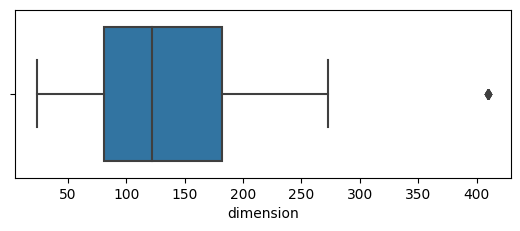

In [20]:
# boxplot
plt.subplot(2,1,2)
sns.boxplot(x=df['dimension'])
plt.show()

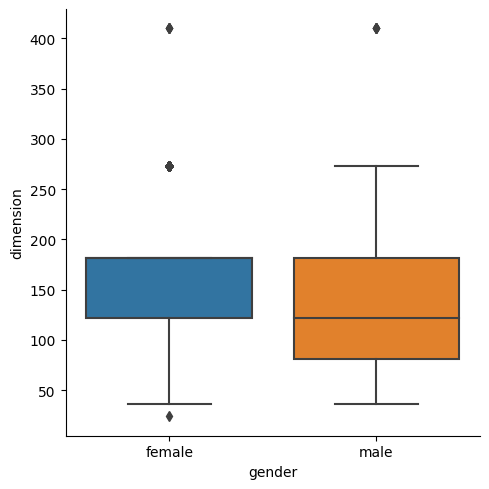

In [17]:
sns.catplot(data=df,x='gender',y='dimension',kind='box')

* Conclusion: 
    * We have almost equal distribution of gender (numbers)
    * Most of the iamges are having dimension more than 60
    * Female most of the female iamges are HD compare to male images
---
- **Consider the image with dimensions more than 60**
- **Resize all the image into 100x100**